## Mais sobre estimação

In [1]:
from thinkbayes2 import Suite

### Problema do euro

- Girou 250 vezes uma moeda;
    - Cara 140;
    - Coroa 110;


- Chance de um resultado como esse é de 7%;

- Mas esses dados evidenciam que a moeda é tendenciosa em vez de justa?

Dois passos
- O primeiro é estimar a probabilidade de a moeda cair para cima.
- O segundo é avaliar se os dados suportam a hipótese de que a moeda é tendenciosa.

A probabilidade de uma dada moeda depende de algumas características;
- Distribuição do peso;

Para x ser igual a 50%, a moeda tem que ser perfeitamente equilibrada;

In [4]:
class Euro(Suite):
    
    def Likelihood(self, data, hypo):
        x = hypo
        if data == 'H':
            return x/100
        else:
            return 1-x/100

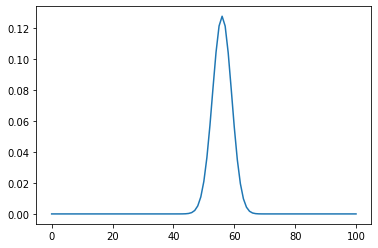

In [5]:
suite = Euro(range(0, 101))
dataset = 'H'*140 + 'T'*110
for data in dataset:
    suite.Update(data)

suite.plot()

### Resumindo a posteriori

Existem várias maneiras de resumir a distribuição posterior

In [7]:
print(suite.summarize(90))

Máxima Verossimilhança: 56 
Média: 55.952380952380956
Mediana: 56
CI: (51, 61)


- That the **observed percentage** is the **maximum likelihood estimator** for the population;
- We would like to know whether the coin is fair

- No intervalo de credibilidade não inclui 50%, isso sugere que a moeda não é justa;

In [8]:
print(suite.Prob(50))

0.02097652612954468


### Swamping the priors

- Priori uniforme não parece ser uma boa escolha;
- Priori triangular, maior probabilidade a valores de x próximos a 50% e menor probabilidade a valores extremos.
- Diferentes priori tendem a convergir para a mesma posterior.

### Otimização

- Mudar o Update para normalizar o conjunto de dados;
- Mudar o likelihood para processar o conjunto de dados;
- As alterações melhoram o tempo de execução;

### Distribuição Beta

- Usar uma distribuição contínua para otimizar o processamento;
- Distribuição Beta;
    - Intervalo de 0 a 1;
    - A priori for Beta, a posteriori também sera Beta;

- A distribuição beta depende de dois parâmetros $(\alpha \ e \ \beta)$;


$priori(\alpha, \beta)$ -> $posteriori(\alpha+h, \beta+t)$

- Só funciona se a distribuição beta for uma boa escolha da priori.

In [12]:
class Beta(object):
    
    def __init__(self, alpha=0, beta=1):
        self.alpha = alpha
        self.beta = beta
    
    def update(self, data):
        heads, tails = data
        self.alpha += heads
        self.beta += tails
    
    def mean(self):
        return float(self.alpha) / (self.alpha + self.beta)
    
    def EvalPdf(self, x):
        return x ** (self.alpha - 1) * (1 - x) ** (self.beta - 1)
    
    def MakePmf(self, steps=101, name=''):
        if self.alpha < 1 or self.beta < 1:
            cdf = self.MakeCdf()
            pmf = cdf.MakePmf()
            return pmf

        xs = [i / (steps - 1.0) for i in xrange(steps)]
        probs = [self.EvalPdf(x) for x in xs]
        pmf = MakePmfFromDict(dict(zip(xs, probs)), name)
        return pmf

    def MakeCdf(self, steps=101):
        xs = [i / (steps - 1.0) for i in xrange(steps)]
        ps = [scipy.special.betainc(self.alpha, self.beta, x) for x in xs]
        cdf = Cdf(xs, ps)
        return cdf

In [13]:
beta = Beta()
beta.update((140, 110))
print(beta.mean())

0.5577689243027888


### Discussões

- Se duas pessoas começam com **priori diferentes**, à medida que **veem mais dados**, suas distribuições **posteriores convergem**;
- E para muitos problemas do mundo real, **mesmas crenças** prévias podem eventualmente ser reconciliadas por dados;
- As crenças posteriores podem não convergir;
- **Regra de Cromwell**, que é a recomendação de que você deve evitar dar uma probabilidade prévia de 0 a qualquer hipótese que seja remotamente possível